In [14]:
import pandas as pd
output = pd.read_csv("../output/output_original-20240218-165024.csv")
scores = output["score"]

In [8]:
max(scores)
min(scores)

C:\Users\akesh\AppData\Local\Temp\ipykernel_10100\269555657.py:3: RuntimeWarning: invalid value encountered in log
  np.log(np.array(scores))


array([nan, nan, nan, ..., nan, nan, nan])

(array([   4.,   23.,   61.,  113.,  151.,  148.,  240.,  325., 1582.,
        3499.]),
 array([-5.87764015e+01, -5.28988081e+01, -4.70212146e+01, -4.11436212e+01,
        -3.52660277e+01, -2.93884343e+01, -2.35108408e+01, -1.76332474e+01,
        -1.17556539e+01, -5.87806046e+00, -4.67008562e-04]),
 <BarContainer object of 10 artists>)

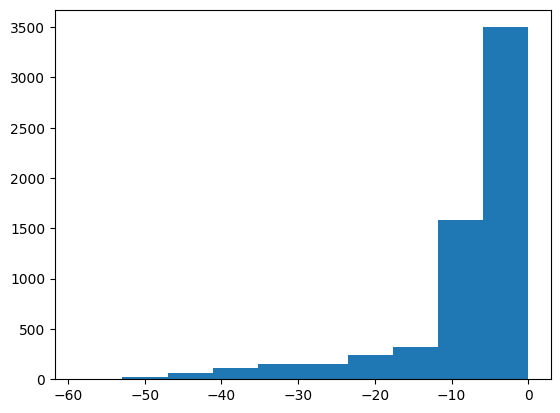

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(scores)

(array([4586.,  766.,  223.,   42.,   58.,   37.,   17.,   20.,   38.,
         359.]),
 array([2.97668688e-26, 9.99533100e-02, 1.99906620e-01, 2.99859930e-01,
        3.99813240e-01, 4.99766550e-01, 5.99719860e-01, 6.99673170e-01,
        7.99626480e-01, 8.99579790e-01, 9.99533100e-01]),
 <BarContainer object of 10 artists>)

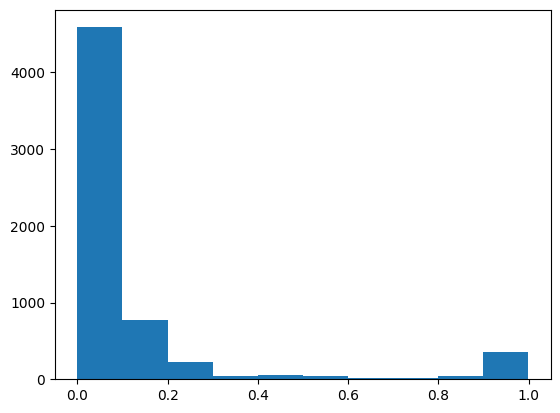

In [11]:
plt.hist(np.exp(np.array(scores)))

(array([ 529.,  711., 1234.,  806.,  693.,  880.,  416.,  315.,  312.,
         250.]),
 array([4.66986753e-05, 8.55021579e-02, 1.70957617e-01, 2.56413076e-01,
        3.41868536e-01, 4.27323995e-01, 5.12779454e-01, 5.98234913e-01,
        6.83690372e-01, 7.69145832e-01, 8.54601291e-01]),
 <BarContainer object of 10 artists>)

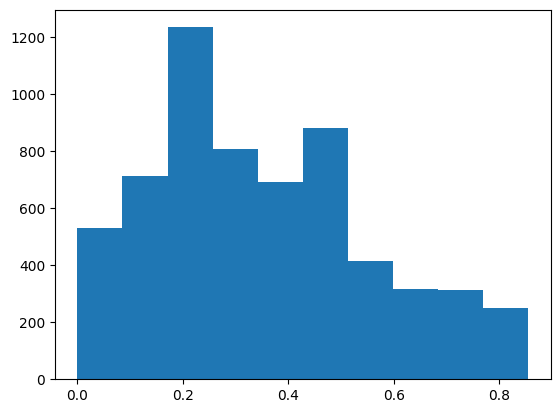

In [24]:
def get_marta_probability(scores, const):
    scores = np.array(scores)
    return scores / (const + scores)

const = 10
plt.hist(get_marta_probability(-scores, const))

(array([2737., 1386., 1017.,  258.,  221.,  149.,  170.,  134.,   57.,
          17.]),
 array([4.67006381e-06, 3.70225515e-02, 7.40404329e-02, 1.11058314e-01,
        1.48076196e-01, 1.85094077e-01, 2.22111959e-01, 2.59129840e-01,
        2.96147721e-01, 3.33165603e-01, 3.70183484e-01]),
 <BarContainer object of 10 artists>)

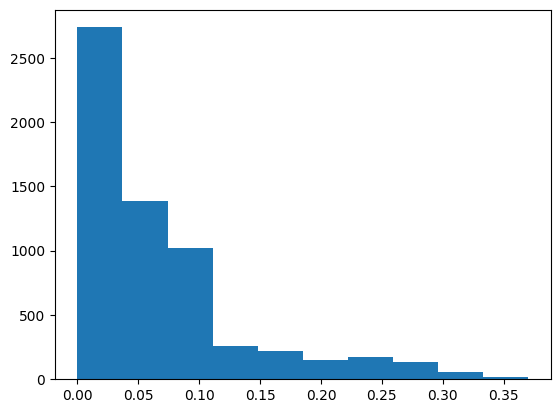

In [25]:
const = 100
plt.hist(get_marta_probability(-scores, const))

In [ ]:
def get_marta_affinity(scores, const):
    """
    Equivalent to trying to rederive a score, and labelling it a binding affinity
    """
    scores = np.array(scores)
    # Actually, cannot be done without a probability in the first place.
    


(array([ 501.,  119.,  252.,  446.,  442.,  338.,  298.,  332.,  335.,
        3083.]),
 array([0.09094769, 0.18185292, 0.27275816, 0.36366339, 0.45456862,
        0.54547385, 0.63637908, 0.72728431, 0.81818954, 0.90909477,
        1.        ]),
 <BarContainer object of 10 artists>)

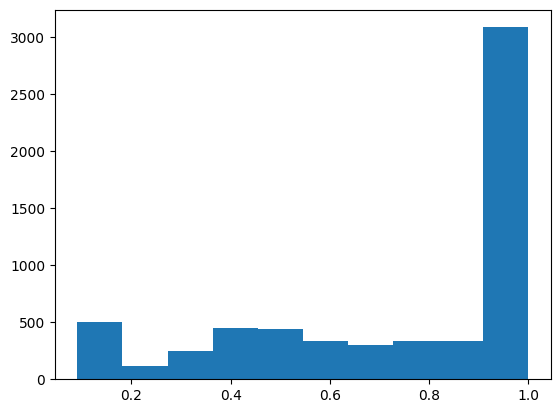

In [37]:
def get_arr_probability(energies, const):
    scores = np.array(energies)
    return 1 / (1 + const * np.exp(energies))

plt.hist(get_arr_probability(scores, const=10))

(array([ 391.,   34.,   42.,   51.,   25.,   93.,  231.,  570.,  713.,
        3996.]),
 array([0.50011675, 0.55010508, 0.6000934 , 0.65008173, 0.70007005,
        0.75005838, 0.8000467 , 0.85003503, 0.90002335, 0.95001168,
        1.        ]),
 <BarContainer object of 10 artists>)

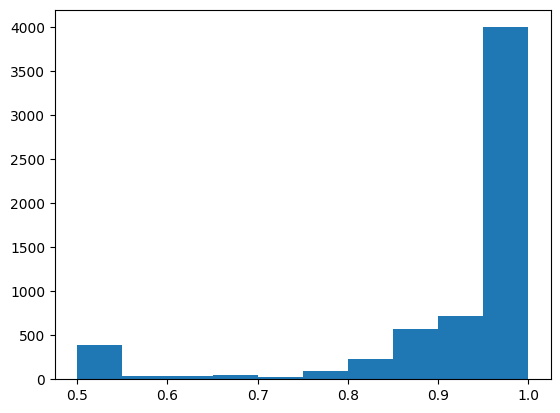

In [39]:
plt.hist(get_arr_probability(scores, const=1))

(array([3095.,  313.,  149.,  118.,  118.,  123.,  118.,  170.,  250.,
        1692.]),
 array([9.99467184e-04, 1.00899520e-01, 2.00799574e-01, 3.00699627e-01,
        4.00599680e-01, 5.00499734e-01, 6.00399787e-01, 7.00299840e-01,
        8.00199893e-01, 9.00099947e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

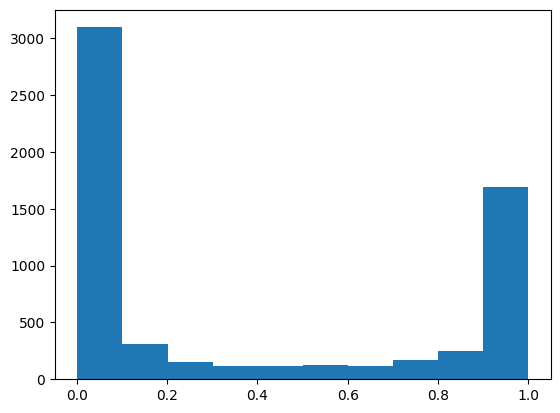

In [38]:
plt.hist(get_arr_probability(scores, const=1000))